# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and dataset

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from skimpy import skim, generate_test_data

import warnings
warnings.filterwarnings("ignore")

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Evaluating the model
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score
from sklearn import tree

# Tuning the model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Loading Dataset

In [75]:
data = pd.read_csv("ExtraaLearn.csv")

In [76]:
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [77]:
# Dimensions of the dataset i.e Rows and Columns
data.shape

(4612, 15)

In [78]:
# Information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

In [79]:
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

In [80]:
# To see the Student ID and check for duplicates
data['ID'].value_counts()

ID
EXT001     1
EXT2884    1
EXT3080    1
EXT3079    1
EXT3078    1
          ..
EXT1537    1
EXT1536    1
EXT1535    1
EXT1534    1
EXT4612    1
Name: count, Length: 4612, dtype: int64

#### Observations:
- The dataset has 4612 rows and 15 columns
- There are no missing values in the data
- ID is the learner identifier and should be dropped as it adds no value
- Unique values show that there are both numerical and categorical columns in the data

In [81]:
# Dropping the ID column from the Dataset as it adds no analytical value at this point
data = data.drop(columns=["ID"])

In [82]:
# Checking for duplicate values
data.duplicated().sum()

14

In [83]:
data.loc[data.duplicated(),:]

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
1097,59,Professional,Website,High,0,0,0.0,Email Activity,No,No,No,No,No,1
1375,58,Professional,Website,High,0,0,0.0,Phone Activity,No,No,No,No,No,1
1592,56,Professional,Mobile App,Medium,0,0,0.0,Phone Activity,No,No,No,No,No,0
1675,56,Professional,Mobile App,Medium,0,0,0.0,Phone Activity,No,No,No,No,No,0
1679,32,Unemployed,Mobile App,High,0,0,0.0,Email Activity,No,No,No,No,No,0
2789,59,Unemployed,Mobile App,High,0,0,0.0,Email Activity,No,No,No,No,No,0
2980,58,Professional,Mobile App,High,0,0,0.0,Email Activity,No,No,No,No,No,0
3013,58,Unemployed,Website,High,0,0,0.0,Email Activity,No,No,No,No,No,0
3227,59,Unemployed,Website,Medium,0,0,0.0,Phone Activity,No,No,No,No,No,0
3278,57,Professional,Mobile App,Medium,0,0,0.0,Phone Activity,No,No,No,No,No,0


**Observations:**
- There are 14 duplicate rows which will be dropped since they are not useful

In [84]:
# Dropping Duplicate Rows
data.drop_duplicates(keep='first', inplace = True)

In [85]:
data.duplicated().sum()

0

For better data exploration let us separate numerical and categorical columns as follows

In [86]:
#Creating numerical columns
n_co = ['age','website_visits','time_spent_on_website','page_views_per_visit']

#Creating categorical columns
c_co = ['current_occupation','first_interaction','profile_completed','last_activity',
        'print_media_type1','print_media_type2','digital_media','educational_channels','referral','status']

## Exploratory Data Analysis (EDA)

In [87]:
#Summary statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4598.0,46.179208,13.160811,18.0,36.00,51.000,57.000,63.000
website_visits,4598.0,3.577642,2.826572,0.0,2.00,3.000,5.000,30.000
time_spent_on_website,4598.0,726.215746,743.884963,0.0,155.25,377.500,1341.750,2537.000
page_views_per_visit,4598.0,3.035339,1.964011,0.0,2.08,2.809,3.759,18.434
status,4598.0,0.299043,0.457889,0.0,0.00,0.000,1.000,1.000


In [88]:
# Function to plot a boxplot and a histogram along the same scale

def histogram_boxplot(data, feature, figsize=(10,5), kde=False, bins=None):
   
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram

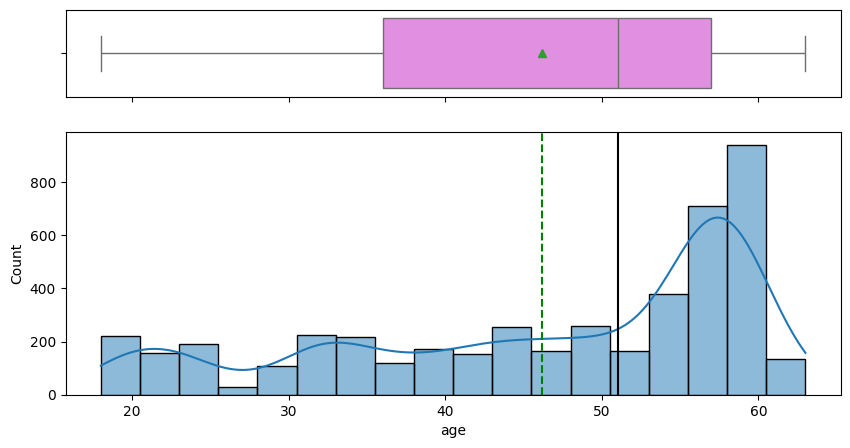

In [89]:
histogram_boxplot(data, "age", kde = True)

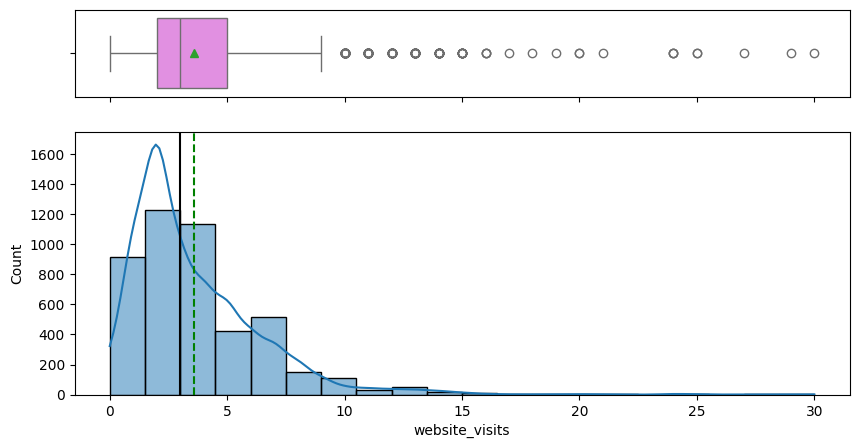

In [90]:
histogram_boxplot(data, "website_visits", kde = True, bins = 20)

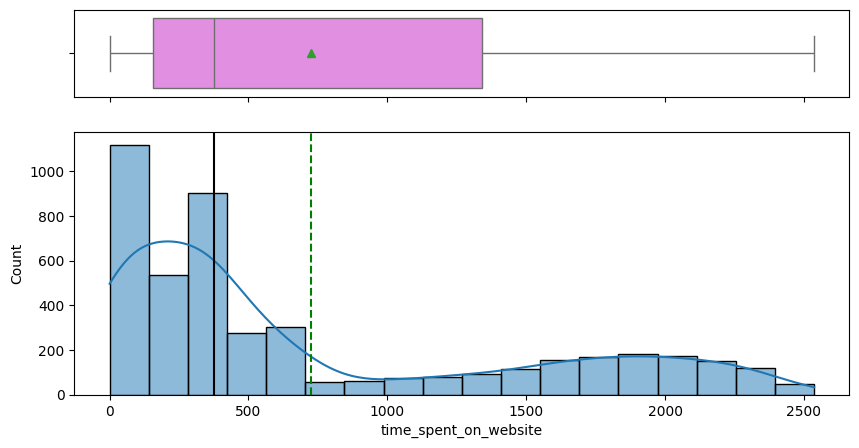

In [91]:
histogram_boxplot(data, "time_spent_on_website", kde = True)

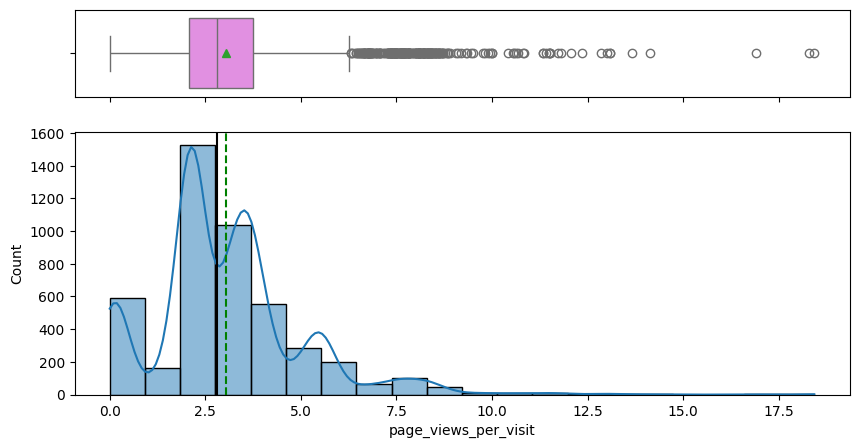

In [92]:
histogram_boxplot(data, "page_views_per_visit", kde = True, bins = 20)

**Observations:**
- The average prospective Learner's age is 46 years and the oldest is 63 years.
- On average prospective learners visit the website 4 times close enough to 3 the median and some never vist the website
- The Average time spent on the website is 7 minutes and the most amount of time spent is 25 minutes
- Learners that visit the website will view an average of 3 pages and the most viewed pages during a visit is 18

#### Analysis of Lead acquisition Channels

In [93]:
for i in c_co:
    print(data[i].value_counts(normalize=True))
    print(data[i].value_counts())
    print('*'*40)
    print('*'*40)

current_occupation
Professional    0.567203
Unemployed      0.312310
Student         0.120487
Name: proportion, dtype: float64
current_occupation
Professional    2608
Unemployed      1436
Student          554
Name: count, dtype: int64
****************************************
****************************************
first_interaction
Website       0.551544
Mobile App    0.448456
Name: proportion, dtype: float64
first_interaction
Website       2536
Mobile App    2062
Name: count, dtype: int64
****************************************
****************************************
profile_completed
High      0.490431
Medium    0.486298
Low       0.023271
Name: proportion, dtype: float64
profile_completed
High      2255
Medium    2236
Low        107
Name: count, dtype: int64
****************************************
****************************************
last_activity
Email Activity      0.493475
Phone Activity      0.267290
Website Activity    0.239234
Name: proportion, dtype: float64
last_acti

**Observations:**
- Professionals show the most interest in Extraalearn at 57% of all inquires followed by unemployed indivduals at 31%
- The website is the most interacted with platform on first contact of inquiry at 55%
- 97.6% of the learners complete 50% and above of their profile
- 50% of the learners communicated through email in their last engagement.
- Only 11% and 5% of the learners learnt about ExtraaLearn from Newspapers and Magazines respectively
- 11.5% learnt about ExtraaLearn through digital media.
- 15% of the learners learned about the platform through educational_channels and only 2% learnt through refferals
- Most Learners Learnt about the platform though educational channels and the least do so through refferals.
- **The Conversion rate is 30%**


### Bivariate and Multivariate Analysis

<Axes: >

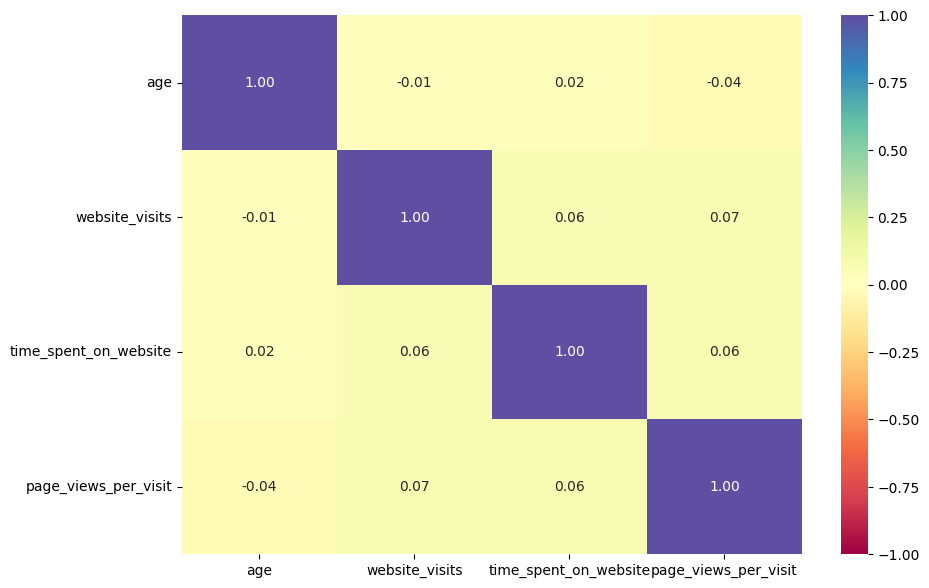

In [94]:
plt.figure(figsize = (10,7))
sns.heatmap(data[n_co].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral")

**Observations:**
- I see no correlation in varriables. 


#### Conversion rate analysis by Categorical columns

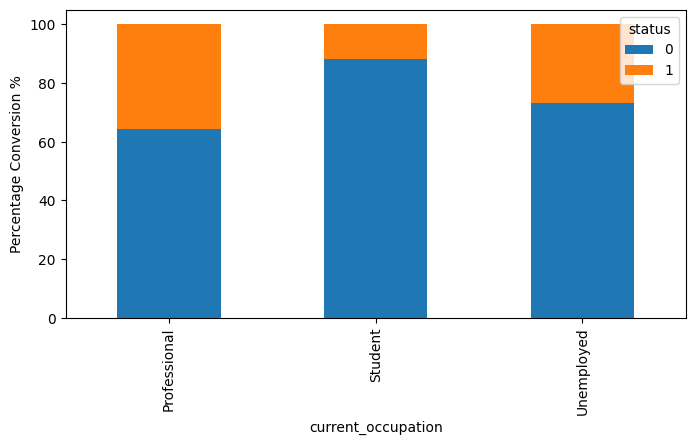

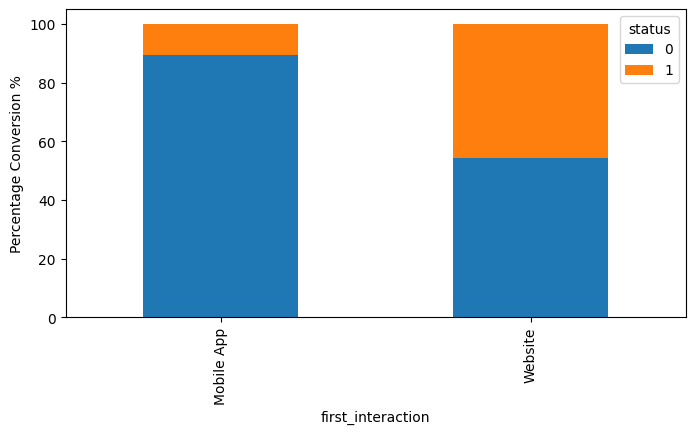

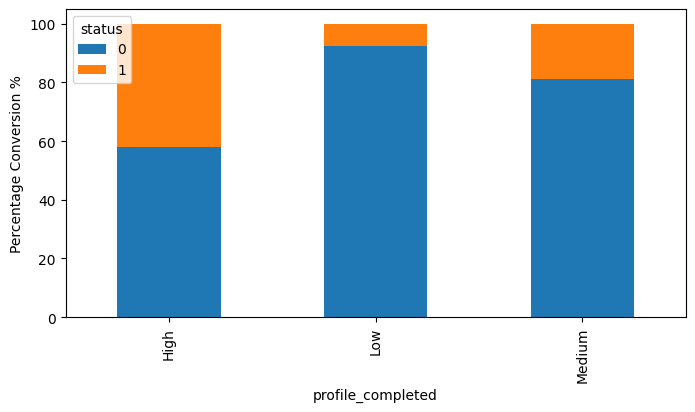

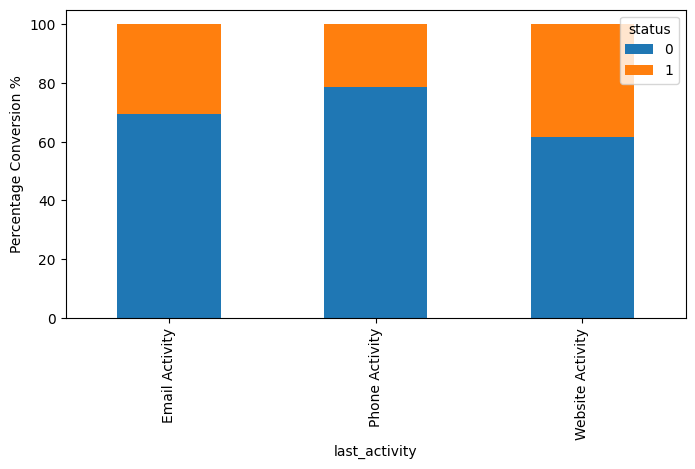

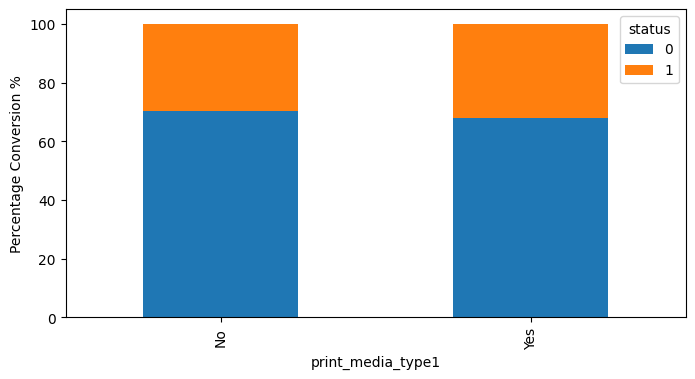

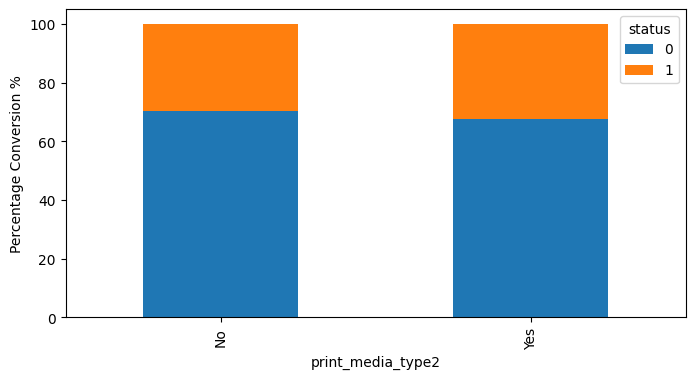

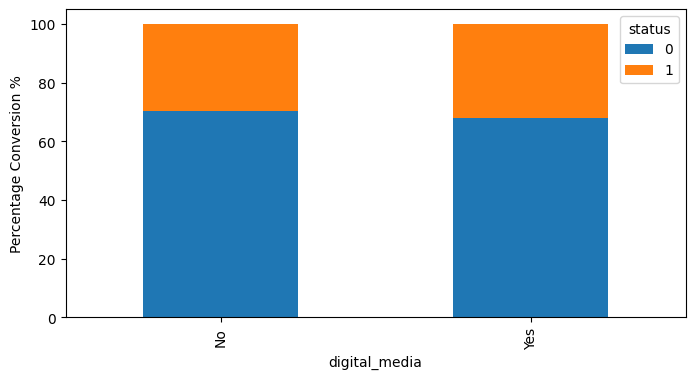

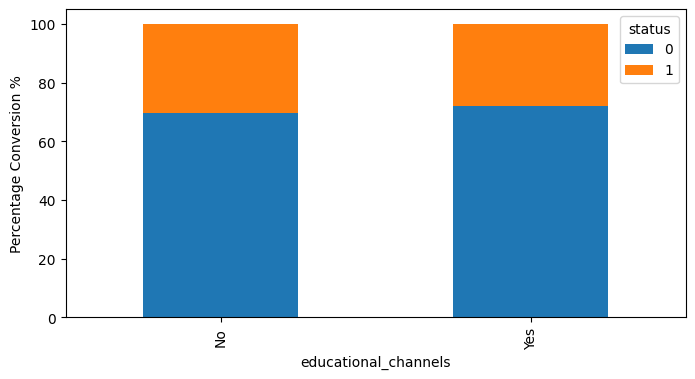

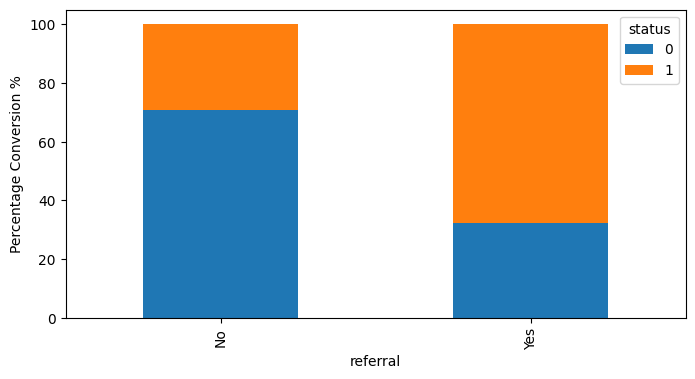

In [95]:
for i in c_co:
    if i!='status':
        (pd.crosstab(data[i],data['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True,)
        plt.ylabel('Percentage Conversion %')

Observations: 
- Approximately 35% of leads who listed as proffessionals become paying customers, this is the highest as compared to students and the unemployed.
- About 45% of the leads got converted through interaction with the website
- Approximately 42% of the leads who had high completion on their profiles became paying customers
- Refferals have the highest conversion rate at approximately 70%. Newspapers, magazines, digital media and educational all have around a 30% conversion

#### Categorical variables dummies

In [96]:
#Creating list for dummy columns and mapping the lead channels 
get_dummies = ['current_occupation', 'first_interaction','profile_completed','last_activity',]

data = pd.get_dummies(data = data, columns = get_dummies, drop_first = True)

pm1 = {'Yes': 1, 'No':0}
pm2 = {'Yes': 1, 'No':0}
dm = {'Yes': 1, 'No':0}
ec = {'Yes': 1, 'No':0}
ref = {'Yes': 1, 'No':0}

data['print_media_type1'] = data.print_media_type1.map(pm1)
data['print_media_type2'] = data.print_media_type2.map(pm2)
data['digital_media'] = data.digital_media.map(dm)
data['educational_channels'] = data.educational_channels.map(ec)
data['referral'] = data.referral.map(ref)

In [97]:
data.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity
0,57,7,1639,1.861,1,0,1,0,0,1,False,True,True,False,False,False,True
1,56,2,83,0.320,0,0,0,1,0,0,False,False,False,False,True,False,True
2,52,3,330,0.074,0,0,1,0,0,0,False,False,True,False,True,False,True
3,53,4,464,2.057,0,0,0,0,0,1,False,True,True,False,False,False,True
4,23,4,600,16.914,0,0,0,0,0,0,True,False,True,False,False,False,False


##### Divide data into Dependent and independent variables

In [98]:
y = data.status
x = data.drop(['status'], axis = 1)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101, stratify = y)

print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (3218, 16)
y_train : (3218,)
X_test : (1380, 16)
y_test : (1380,)


In [100]:
# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=x.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=x.columns)

In [101]:
# Creating metric function 

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['No Conversion', 'Conversion'], yticklabels=['No Conversion', 'Conversion'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

## Building a Decision Tree model

In [102]:
dt = DecisionTreeClassifier( random_state = 1)

In [103]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2256
           1       1.00      1.00      1.00       962

    accuracy                           1.00      3218
   macro avg       1.00      1.00      1.00      3218
weighted avg       1.00      1.00      1.00      3218



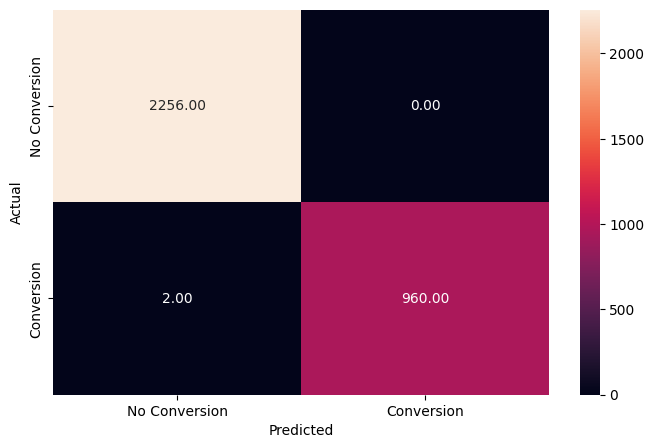

In [104]:
y_train_pred_dt = dt.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       967
           1       0.68      0.68      0.68       413

    accuracy                           0.81      1380
   macro avg       0.77      0.77      0.77      1380
weighted avg       0.81      0.81      0.81      1380



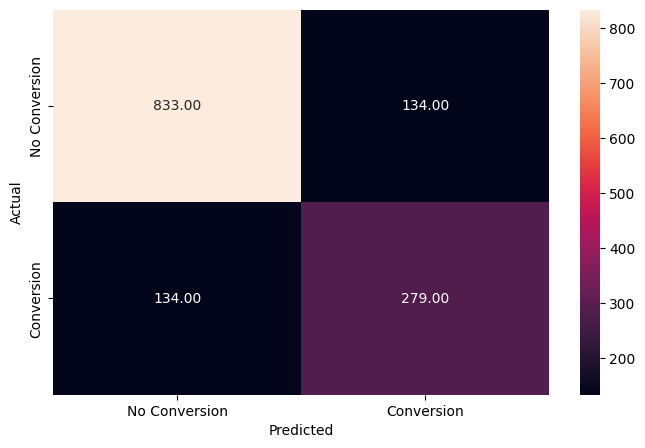

In [105]:
y_test_pred_dt = dt.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

#### Observation
- The decision tree should be prunned as it is overfiting and it also performs relatively poor on the Test data sample 

## Building a Decision Tree with Hyperparameter Tunning as Pre-Prunning

In [106]:
#Hyperparameter Tunning
crit = ['gini', 'entropy']
max_d = [int(x) for x in np.linspace(start = 0, stop = 10, num = 5)]
max_f = [5,10,'auto','sqrt', 'log2']
min_lf = [30,50,60,80]
min_sp =[50,100]

# Creating the random grid
parameters = {'criterion': crit, 
             'max_depth' : max_d,
             'max_features': max_f,
              'min_samples_leaf': min_lf,
             'min_samples_split' : min_sp
             }
dt_Model= DecisionTreeClassifier()
print(parameters)

{'criterion': ['gini', 'entropy'], 'max_depth': [0, 2, 5, 7, 10], 'max_features': [5, 10, 'auto', 'sqrt', 'log2'], 'min_samples_leaf': [30, 50, 60, 80], 'min_samples_split': [50, 100]}


**With GridSearchCV**

In [107]:
dt_grid = GridSearchCV(estimator = dt_Model, param_grid = parameters, cv = 5, verbose = 10, n_jobs = -1)

In [108]:
dt_grid.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 2, 5, 7, 10],
                         'max_features': [5, 10, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [30, 50, 60, 80],
                         'min_samples_split': [50, 100]},
             verbose=10)

**With RandomizedSearchCV**

In [36]:
# Building decision tree model
dt_rand = RandomizedSearchCV(estimator = dt_Model, param_distributions = parameters, cv = 5, verbose = 1, n_iter = 250)

In [37]:
# Fitting decision tree model
dt_rand.fit(X_train, y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=250,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [0, 2, 5, 7, 10],
                                        'max_features': [5, 10, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [30, 50, 60, 80],
                                        'min_samples_split': [50, 100]},
                   verbose=1)

In [38]:
# Acquring the best estimates for the parameters that give the 
print (dt_rand.best_estimator_)
print (dt_rand.best_score_)
print('*'*40)
print('*'*40)
print (dt_grid.best_estimator_)
print (dt_grid.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=10,
                       min_samples_leaf=60, min_samples_split=50)
0.8471045081769268
****************************************
****************************************
DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=10,
                       min_samples_leaf=30, min_samples_split=50)
0.8551896679964838


In [39]:
dt_mod =DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=10,
                       min_samples_leaf=30, min_samples_split=50)
dt_mod.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=10,
                       min_samples_leaf=30, min_samples_split=50)

In [40]:
print (f'Train Accuracy - : {dt_mod.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {dt_mod.score(X_test,y_test):.3f}')

Train Accuracy - : 0.860
Test Accuracy - : 0.834


              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2256
           1       0.76      0.77      0.77       962

    accuracy                           0.86      3218
   macro avg       0.83      0.83      0.83      3218
weighted avg       0.86      0.86      0.86      3218



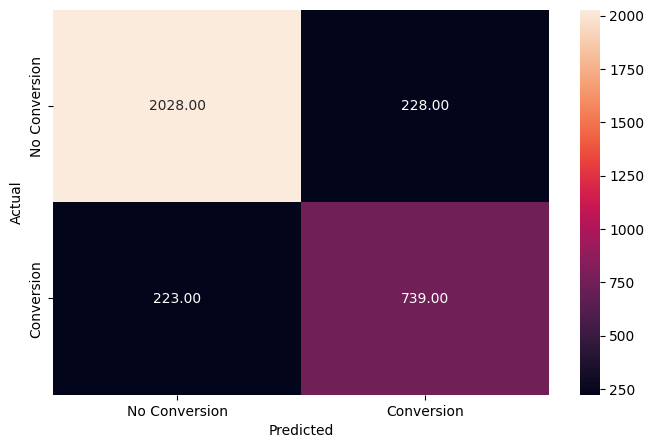

In [41]:
# Checking performance on the training dataset
y_train_pred_dt = dt_mod.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       967
           1       0.72      0.74      0.73       413

    accuracy                           0.83      1380
   macro avg       0.80      0.81      0.80      1380
weighted avg       0.84      0.83      0.83      1380



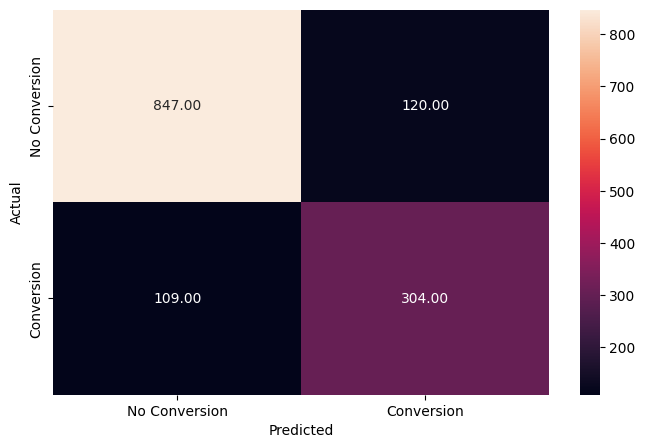

In [42]:
# Checking performance on the test dataset
y_test_pred_dt = dt_mod.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

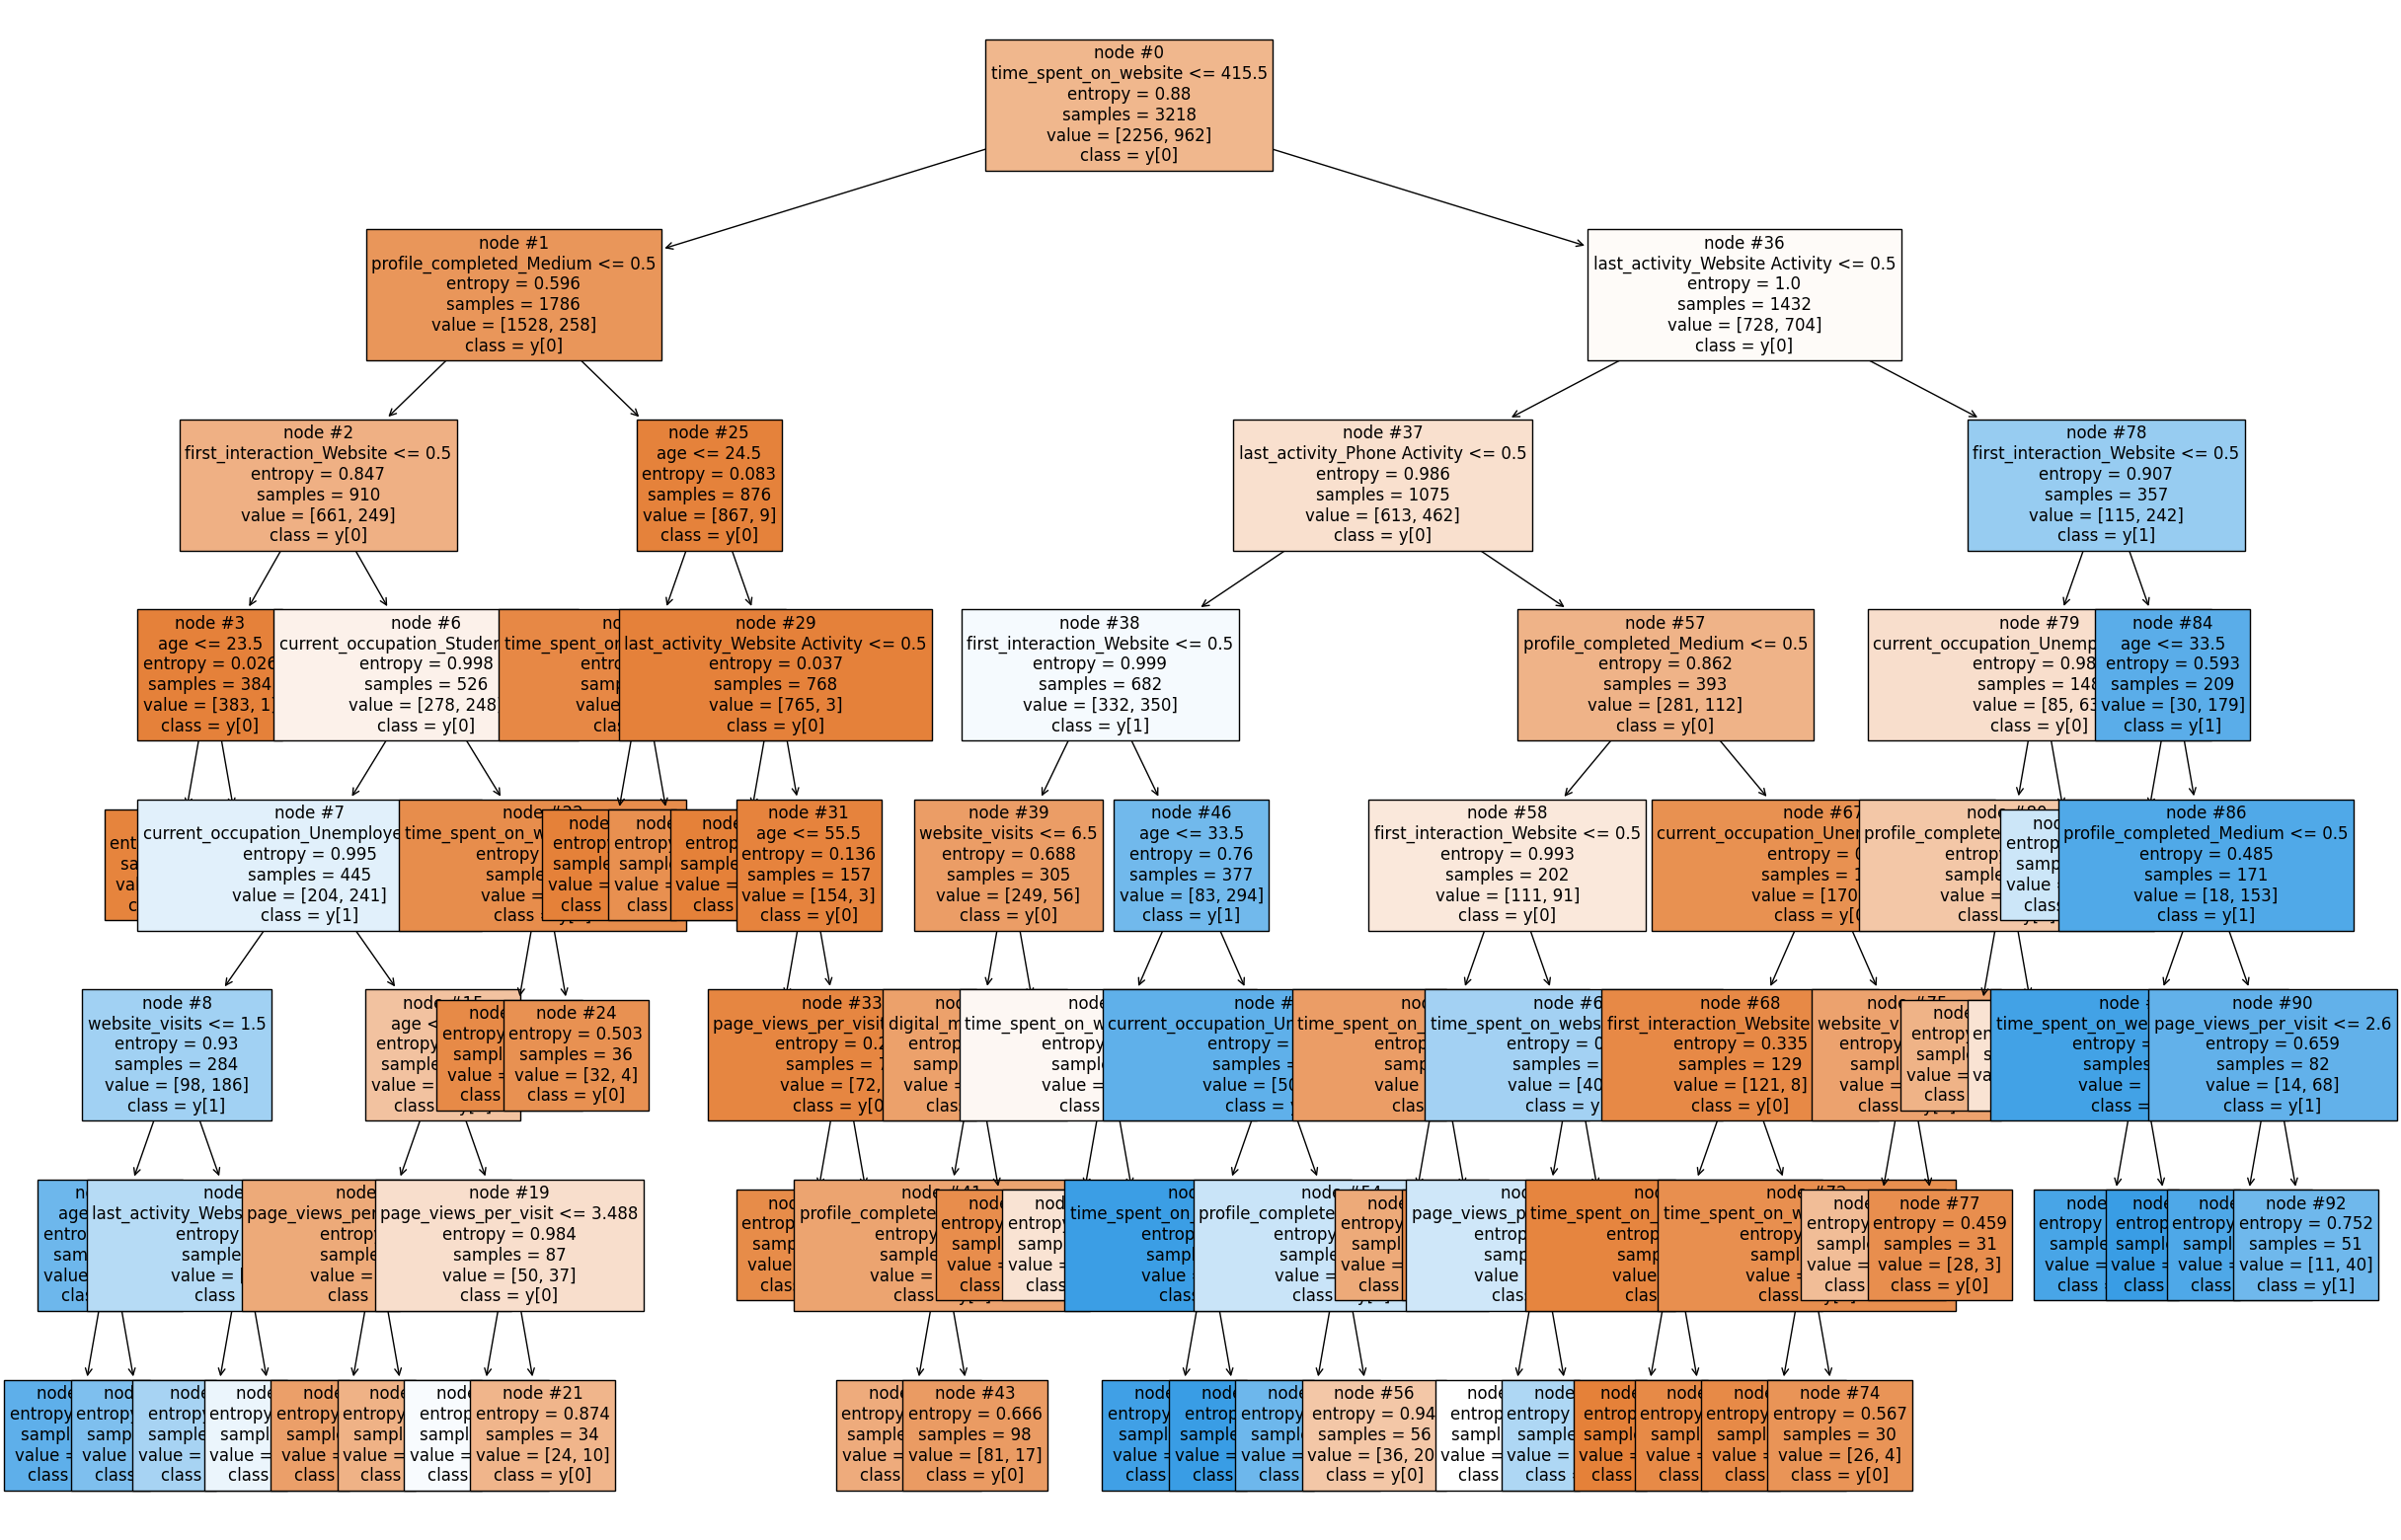

In [43]:
features = list(x.columns)

plt.figure(figsize = (30, 20))

tree.plot_tree(dt_mod, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True)

plt.show()

<Axes: xlabel='Importance', ylabel='None'>

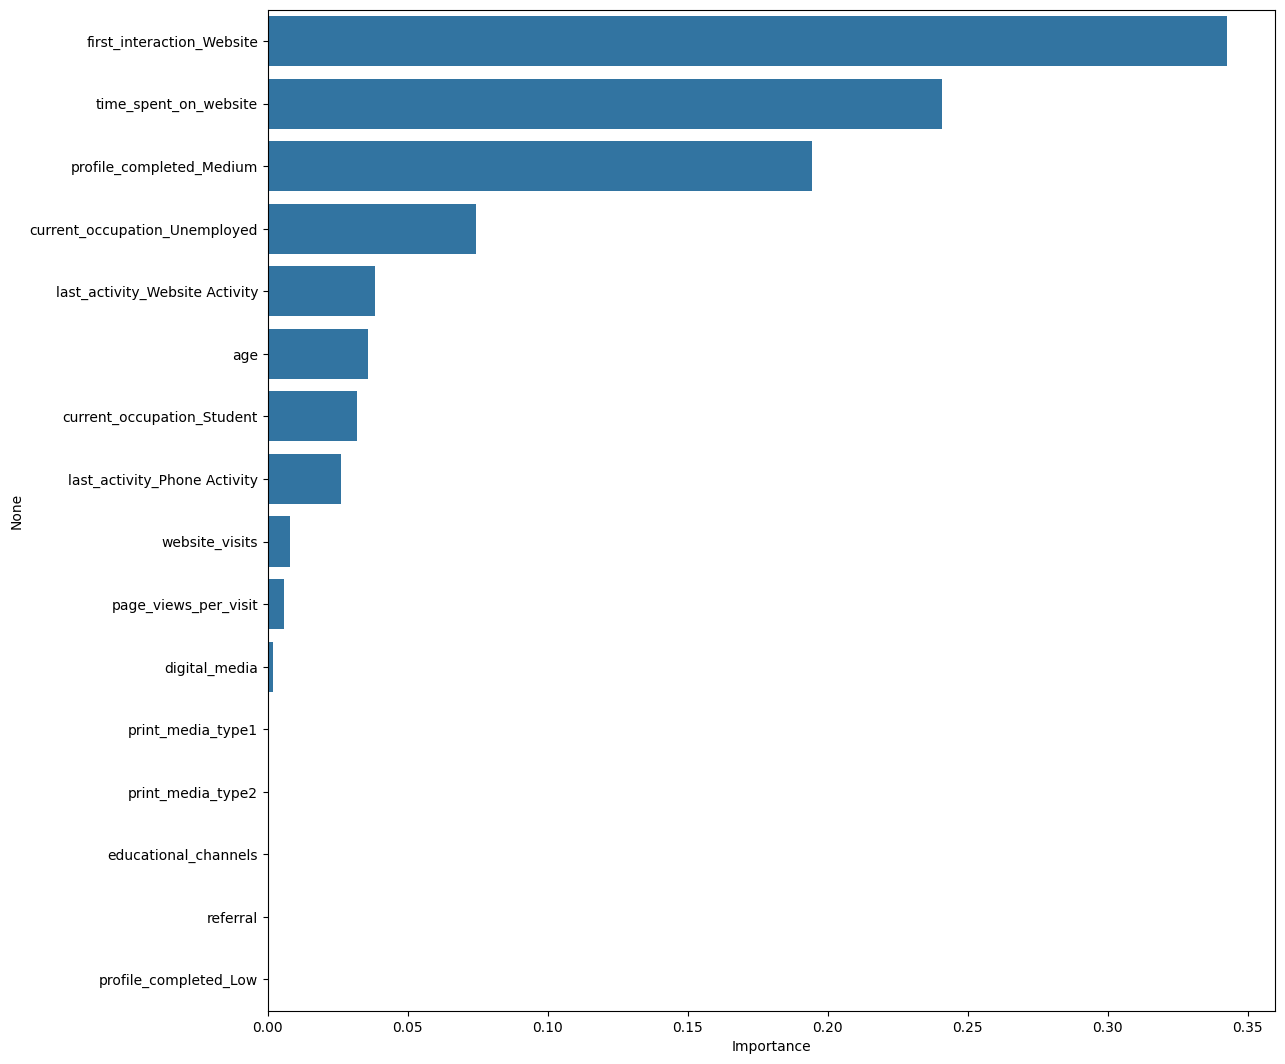

In [44]:
importances = dt_mod.feature_importances_
columns = x.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

### Observations
- I already preprunned the model because it was Overfitting by adjusting the hyperparameters.

## Building a Random Forest model

In [45]:
#Fitting the Random Forest classifier on the training data
rf = RandomForestClassifier(random_state = 1)

rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2256
           1       1.00      1.00      1.00       962

    accuracy                           1.00      3218
   macro avg       1.00      1.00      1.00      3218
weighted avg       1.00      1.00      1.00      3218



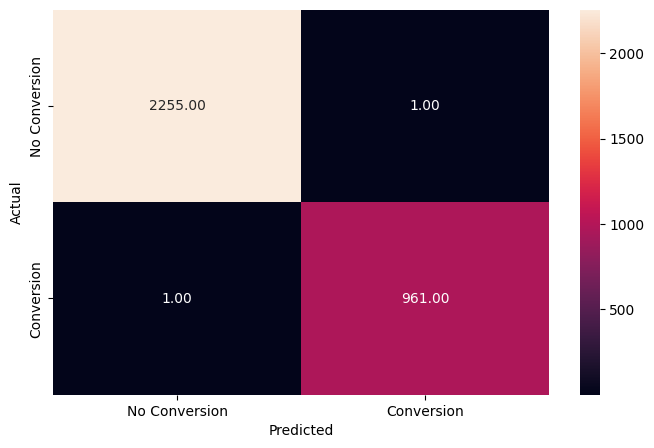

In [46]:
# Checking performance on the training data
y_pred_train_rf = rf.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       967
           1       0.79      0.70      0.75       413

    accuracy                           0.86      1380
   macro avg       0.84      0.81      0.82      1380
weighted avg       0.85      0.86      0.85      1380



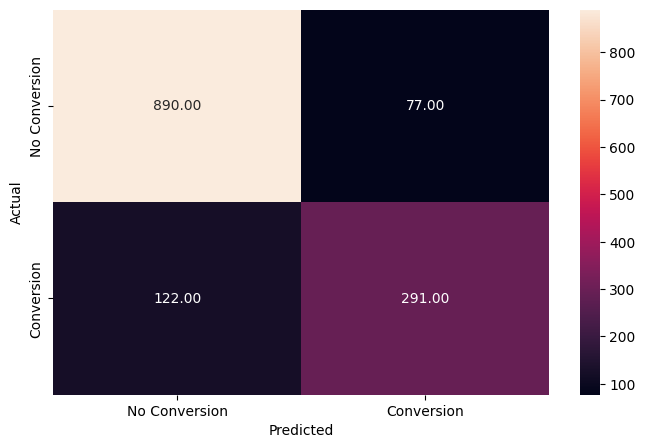

In [47]:
y_test_pred_dt = rf.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

## The random tree aslo overfits 

## Building a Random Forest with Hyperparameter Tunning as Pre-Prunning

In [48]:
n_est = [int(x) for x in np.linspace(start = 20, stop = 60, num = 5)]
max_d = [int(x) for x in np.linspace(start = 0, stop = 10, num = 5)]
max_f = [5,10,'auto','sqrt', 'log2']
min_lf = [30,50,60,80]
min_sp =[50,100]
btsr = [True, False]

# Creating the random grid
parameters = {'n_estimators': n_est, 
             'max_depth' : max_d,
             'max_features': max_f,
              'min_samples_leaf': min_lf,
             'min_samples_split' : min_sp,
              'bootstrap': btsr
             }
print(parameters)

rf_Model= RandomForestClassifier()

{'n_estimators': [20, 30, 40, 50, 60], 'max_depth': [0, 2, 5, 7, 10], 'max_features': [5, 10, 'auto', 'sqrt', 'log2'], 'min_samples_leaf': [30, 50, 60, 80], 'min_samples_split': [50, 100], 'bootstrap': [True, False]}


**With GridSearchCV**

In [49]:
rf_grid = GridSearchCV(estimator = rf_Model, param_grid = parameters, cv = 2, verbose = 10, n_jobs = -1)

In [50]:
rf_grid.fit(X_train, y_train)

Fitting 2 folds for each of 2000 candidates, totalling 4000 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [0, 2, 5, 7, 10],
                         'max_features': [5, 10, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [30, 50, 60, 80],
                         'min_samples_split': [50, 100],
                         'n_estimators': [20, 30, 40, 50, 60]},
             verbose=10)

**With RandomizedSearchCV**

In [51]:
# Building decision tree model
rf_rand = RandomizedSearchCV(estimator = rf_Model, param_distributions = parameters, cv = 5, verbose = 1, n_iter = 250)

In [52]:
# Fitting decision tree model
rf_rand.fit(X_train, y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=250,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [0, 2, 5, 7, 10],
                                        'max_features': [5, 10, 'auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [30, 50, 60, 80],
                                        'min_samples_split': [50, 100],
                                        'n_estimators': [20, 30, 40, 50, 60]},
                   verbose=1)

In [69]:
# Acquring the best estimates for the parameters that give the 
print (f'Grid Search Estimator -: {rf_grid.best_estimator_}')
print (f'Grid Search Best score -: {rf_grid.best_score_}')
print('*'*40)
print('*'*40)
print (f'Random Search Estimator -: {rf_rand.best_estimator_}')
print (f'Random Search Best Score -: {rf_rand.best_score_}')



Grid Search Estimator -: RandomForestClassifier(bootstrap=False, max_depth=10, max_features=5,
                       min_samples_leaf=30, min_samples_split=50,
                       n_estimators=30)
Grid Search Best score -: 0.8592293349906774
****************************************
****************************************
Random Search Estimator -: RandomForestClassifier(bootstrap=False, max_depth=7, max_features=5,
                       min_samples_leaf=30, min_samples_split=100,
                       n_estimators=40)
Random Search Best Score -: 0.8579769713010637


In [72]:
rf_mod = RandomForestClassifier(bootstrap=False, max_depth=10, max_features=5,
                       min_samples_leaf=30, min_samples_split=50,
                       n_estimators=30)
rf_mod.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features=5,
                       min_samples_leaf=30, min_samples_split=50,
                       n_estimators=30)

In [73]:
print (f'Train Accuracy - : {rf_mod.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_mod.score(X_test,y_test):.3f}')

Train Accuracy - : 0.868
Test Accuracy - : 0.860


              precision    recall  f1-score   support

           0       0.88      0.92      0.90       967
           1       0.80      0.71      0.75       413

    accuracy                           0.86      1380
   macro avg       0.84      0.82      0.83      1380
weighted avg       0.86      0.86      0.86      1380



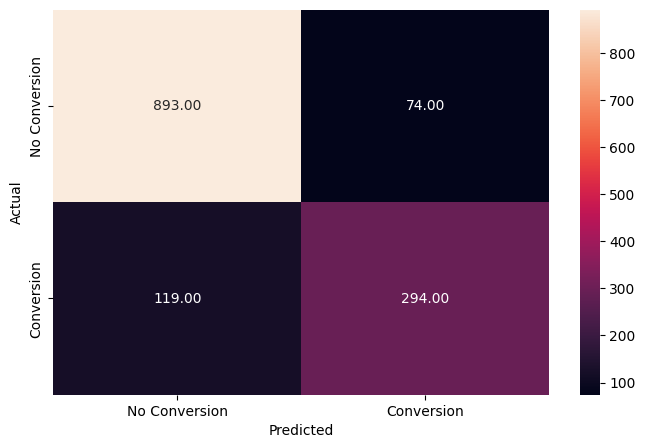

In [74]:
# Checking performance on the testing data
y_pred_test_rf = rf_mod.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

<Axes: xlabel='Importance', ylabel='None'>

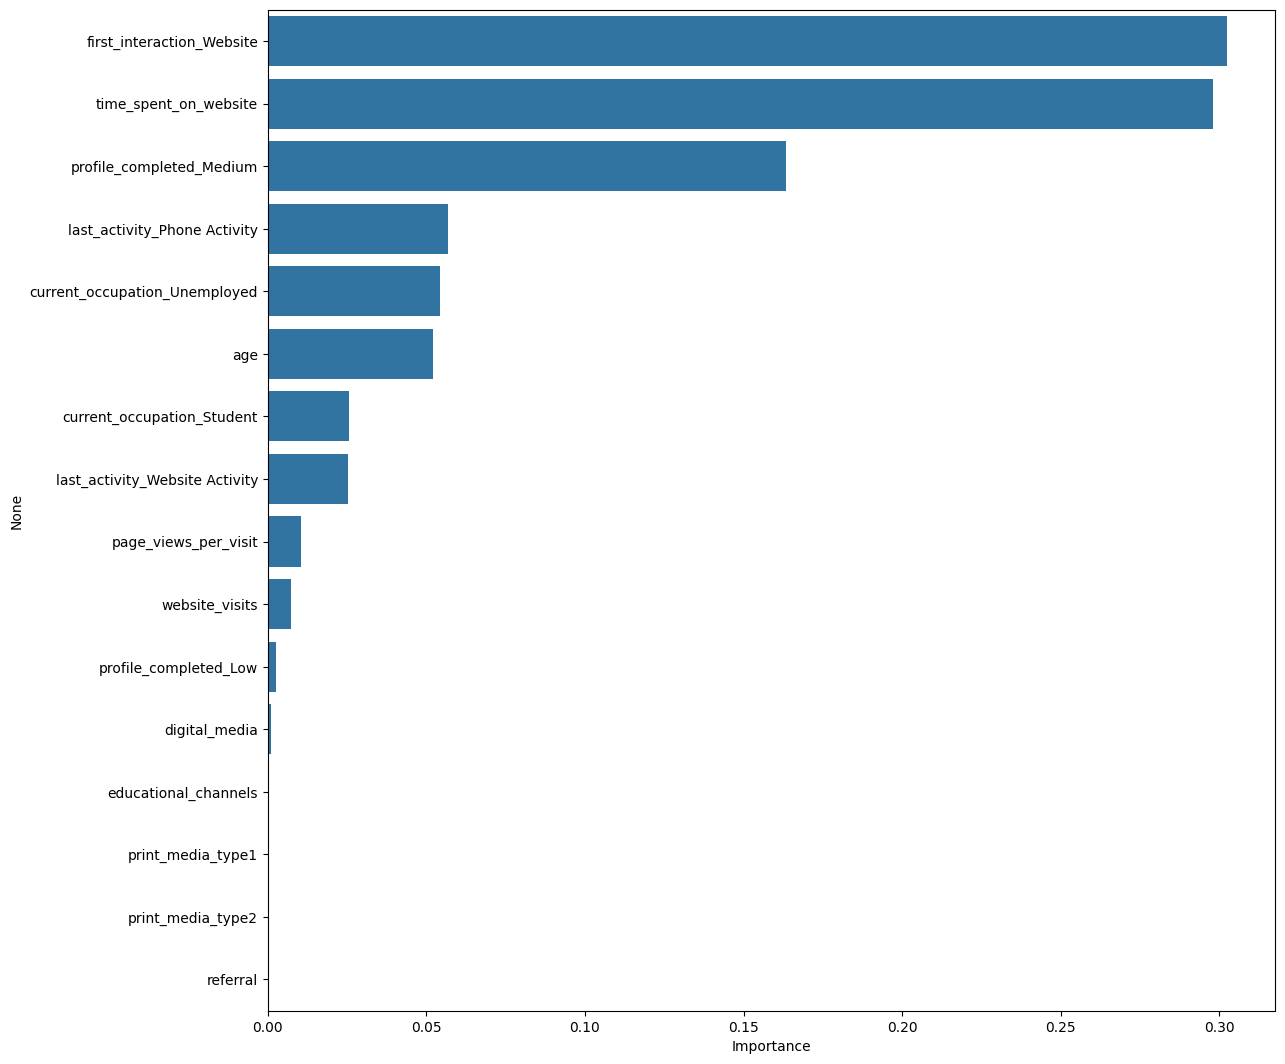

In [58]:
importances = rf_mod.feature_importances_
columns = x.columns
importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)
plt.figure(figsize = (13, 13))
sns.barplot(data = importance_df, x = importance_df.Importance, y = importance_df.index)

## Actionable Insights and Recommendations

**Website should be more interactive at this rate, becasuse the leads spend plenty of time.**

**I couldn't catch it on the final metrics but the refferal conversion is higher on EDA. Give the leads a discount based on referfal.**
